# csgocrashedge

In [1]:
from decimal import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
data = []  # contains list of data points

# extracts data from input.txt into a list, removes first line since element doesn't follow form
f = open('./input.txt', "r")
getcontext().prec = 4
data = f.readlines()
del data[0]
f.close()

# converts data into list of floats rather than strings
float_data = []
for line in data:
    if line == data[len(data) - 1]:
        continue
    float_data.append(float(line.split(" ")[2].split("\n")[0]))
data = float_data

46550


In [3]:
data = np.array(data)
df_data = pd.DataFrame(data)
df_data.rename(columns={0:'results'}, inplace=True)
df_data.describe()
# crashes that immediately occur and the gambler loses regardless of their exit time are labeled as '0' in the original data which is equivalent to '1'
df_data.loc[df_data['results'] == 0] = 1
# Apply upper limit so that the histogram doesn't stretch out too much
df_data.loc[df_data['results'] > 10] = 10

,results
count,46549.000000
mean,12.429668
std,425.397198
min,0.000000
25%,1.280000
50%,1.910000
75%,3.870000
max,67558.300000


In [24]:
def func(x):
    return 1-1/x

(1.0, 10.0)

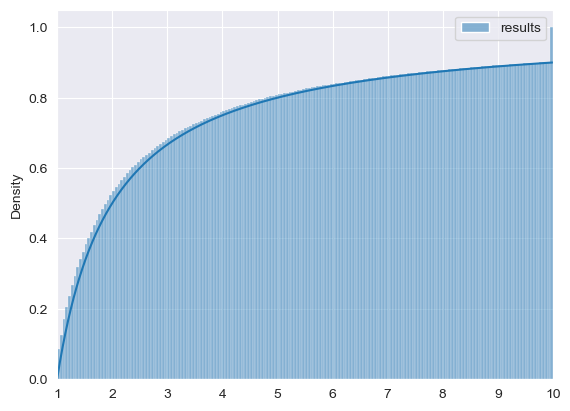

In [26]:
sns.histplot(df_data, kde=False, cumulative=True, stat='density', binwidth=0.05)
plt.plot(np.arange(1, 10, 0.01), func(np.arange(1, 10, 0.01)))
plt.xlim(1, 10)
# plt.yticks(np.arange(0, 1, 0.05))
# sns.histplot(df_data, kde=False, cumulative=False, stat='probability', binwidth=0.05)
# sns.kdeplot(df_data)


Here I have plotted the cumulative distribution function of the gambling data with a histogram, along with the CDF of a Pareto distribution with x_min=1 and alpha=1. I chose to manipulate the data such that every value above 10 is set to 10 in order for it to fit into the histogram. This prevents the graph from stretching to the point where it becomes unreadable.

Now notice that the histogram of the crash data lies slightly above the Pareto distribution curve. This would be typical for the results of a game of chance with a slight house edge, as the curve represents the percent of values in the data that lie below the specified x value. Let's reduce the domain of the graph to observe this difference closer.

(1.0, 4.0)

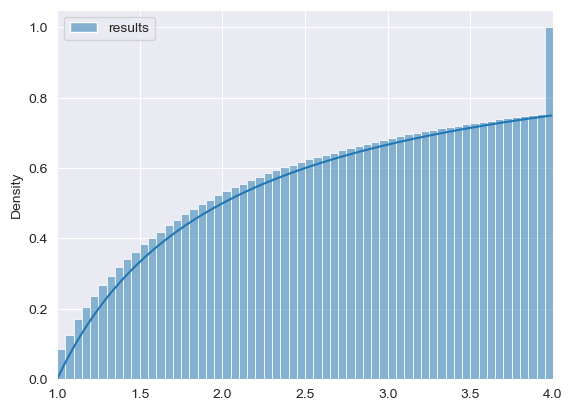

In [27]:
df_data.loc[df_data['results'] > 4] = 4
sns.histplot(df_data, kde=False, cumulative=True, stat='density', binwidth=0.05)
plt.plot(np.arange(1, 4, 0.01), func(np.arange(1, 4, 0.01)))
plt.xlim(1, 4)
# plt.yticks(np.arange(0, 1, 0.05))
# sns.histplot(df_data, kde=False, cumulative=False, stat='probability', binwidth=0.05)
# sns.kdeplot(df_data)


In [ ]:
def pdf_func(x):
    return 1/x

The differences in the two curves appear much more obvious now right? But how do we know whether is this due to a purposefully added house edge or just noise?